<a href="https://colab.research.google.com/github/TusharNandeshwar/Heart-Disease-Prediction/blob/main/heartDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
7 == 7


True

# **HEART DISEASE ANALYSIS AND PREDICATION**

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing data

In [ ]:
#hd = pd.read_csv('/content/drive/MyDrive/Heart_disease.csv')
#hd.head()
#temporary upload

In [ ]:
heart_disease = pd.read_csv('/content/drive/MyDrive/Heart_disease.csv')

View of data

In [ ]:
heart_disease
#hd.head()
#hd.tail()
#hd.shape


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


# **Data Pre-prossing / Data Filtering**

In [ ]:
hd = heart_disease

In [ ]:
#hd.isna()
hd.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
hd = hd.drop('cigsPerDay', axis = 1)  #drop: because currentSmoker and cigsPerDay almost same
print(hd.columns)

Index(['male', 'age', 'currentSmoker', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [ ]:
hd['totChol'] = hd['totChol'].fillna(value=hd['totChol'].mean())
hd.isna().sum()

male                 0
age                  0
currentSmoker        0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
hd['glucose'] = hd['glucose'].fillna(value=hd['glucose'].mean())
hd.isna().sum()

male                0
age                 0
currentSmoker       0
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                19
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [ ]:
hd.dropna(inplace = True)
hd.isna().sum()

male               0
age                0
currentSmoker      0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
hd.duplicated().sum()

0

In [ ]:
hd.shape

(4165, 14)

In [ ]:
hd['BPMeds'] = hd['BPMeds'].astype(int)

In [ ]:
hd.head()

,male,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# **Data Visualisation and EDA**

In [ ]:
hd.describe()

,male,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000
mean,0.431693,49.522449,0.495318,0.029532,0.005282,0.308764,0.025210,236.733166,132.261585,82.899280,25.803873,75.875630,81.930452,0.149340
std,0.495372,8.539437,0.500038,0.169312,0.072495,0.462039,0.156781,44.234956,21.912685,11.873275,4.076844,12.060582,22.711221,0.356466
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,0.000000,0.000000,1.000000,0.000000,262.000000,143.500000,89.500000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
hd['TenYearCHD'].value_counts()

0    3543
1     622
Name: TenYearCHD, dtype: int64

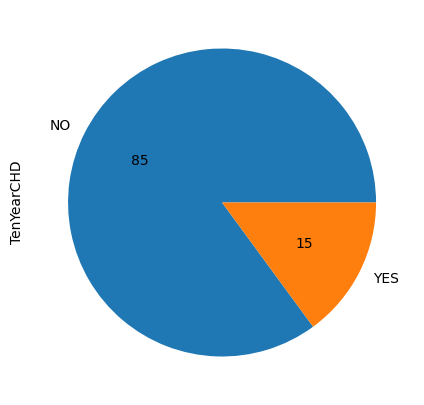

In [ ]:
hd['TenYearCHD'].value_counts().plot(kind = 'pie', figsize = (5,5), labels= ['NO', 'YES'], autopct = '%.f')
plt.show()

In [ ]:
hd['male'].value_counts()

0    2367
1    1798
Name: male, dtype: int64

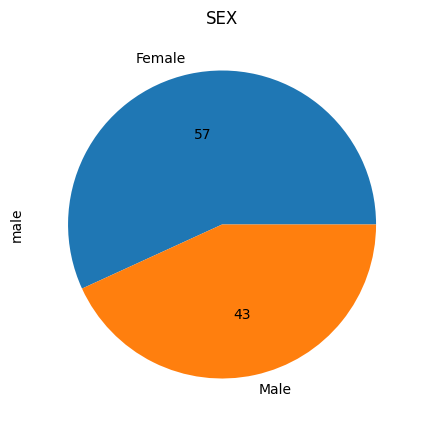

In [ ]:
hd['male'].value_counts().plot(kind = 'pie', figsize = (5,5), labels= ['Female', 'Male'] , title = 'SEX', autopct = '%.f')
plt.show()

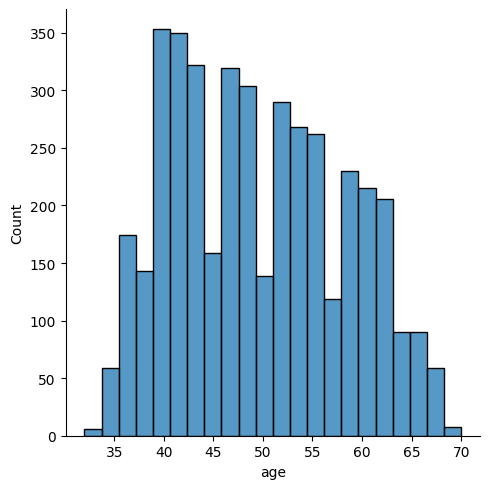

In [ ]:
sns.displot(hd['age'])

In [ ]:
#plt.figure(1, figsize=(20, 9))
#x = hd.drop('TenYearCHD', axis=1)
#n = range(1,13)
#grid_size = (3, 5)  # 3 rows and 5 columns
#for f in x:
#   n += 1
#   plt.subplot(*grid_size, n)  # Use a single tuple for subplot position
#    plt.subplots_adjust(hspace=0.5, wspace=0.5)
#    sns.countplot(x=f, hue='TenYearCHD', data=hd, alpha=0.85)

#plt.show()


<Axes: ylabel='heart disease'>

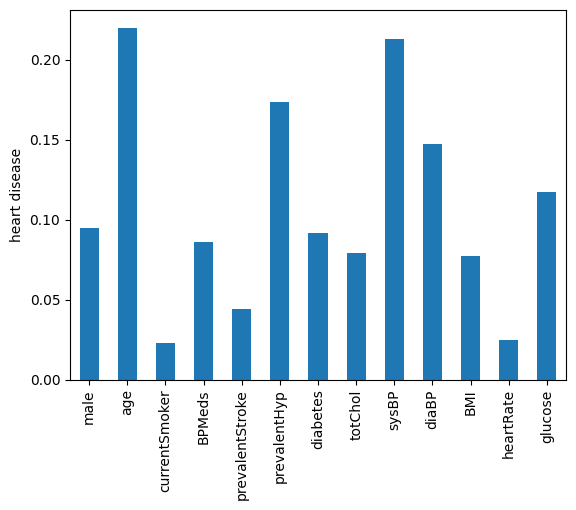

In [ ]:
 #CORRELATION
hd.corr()['TenYearCHD'][:-1].plot(kind='bar', ylabel = 'heart disease')

In [ ]:
hd.corr()

,male,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.025568,0.194309,-0.051821,-0.003325,0.006131,0.014447,-0.067414,-0.035749,0.057514,0.080581,-0.117390,0.003868,0.094503
age,-0.025568,1.000000,-0.213482,0.122373,0.043645,0.302821,0.101373,0.261315,0.391332,0.205523,0.134934,-0.012590,0.114010,0.220116
currentSmoker,0.194309,-0.213482,1.000000,-0.048007,-0.032442,-0.101845,-0.042912,-0.046685,-0.128725,-0.106493,-0.169107,0.061189,-0.050483,0.022786
BPMeds,-0.051821,0.122373,-0.048007,1.000000,0.124248,0.261009,0.053370,0.080740,0.256902,0.194173,0.100713,0.014853,0.050042,0.086072
prevalentStroke,-0.003325,0.043645,-0.032442,0.124248,1.000000,0.066013,0.009411,0.007554,0.053932,0.048049,0.030199,-0.011883,0.015242,0.043813
prevalentHyp,0.006131,0.302821,-0.101845,0.261009,0.066013,1.000000,0.074858,0.161847,0.695699,0.616855,0.303333,0.148077,0.080943,0.173442
diabetes,0.014447,0.101373,-0.042912,0.053370,0.009411,0.074858,1.000000,0.043172,0.099755,0.048905,0.083615,0.050810,0.605001,0.091612
totChol,-0.067414,0.261315,-0.046685,0.080740,0.007554,0.161847,0.043172,1.000000,0.210059,0.166390,0.120271,0.091612,0.044921,0.079098
sysBP,-0.035749,0.391332,-0.128725,0.256902,0.053932,0.695699,0.099755,0.210059,1.000000,0.786166,0.329320,0.182215,0.125907,0.212980
diaBP,0.057514,0.205523,-0.106493,0.194173,0.048049,0.616855,0.048905,0.166390,0.786166,1.000000,0.381351,0.179135,0.057758,0.147281


## **Analysis points**

<Axes: >

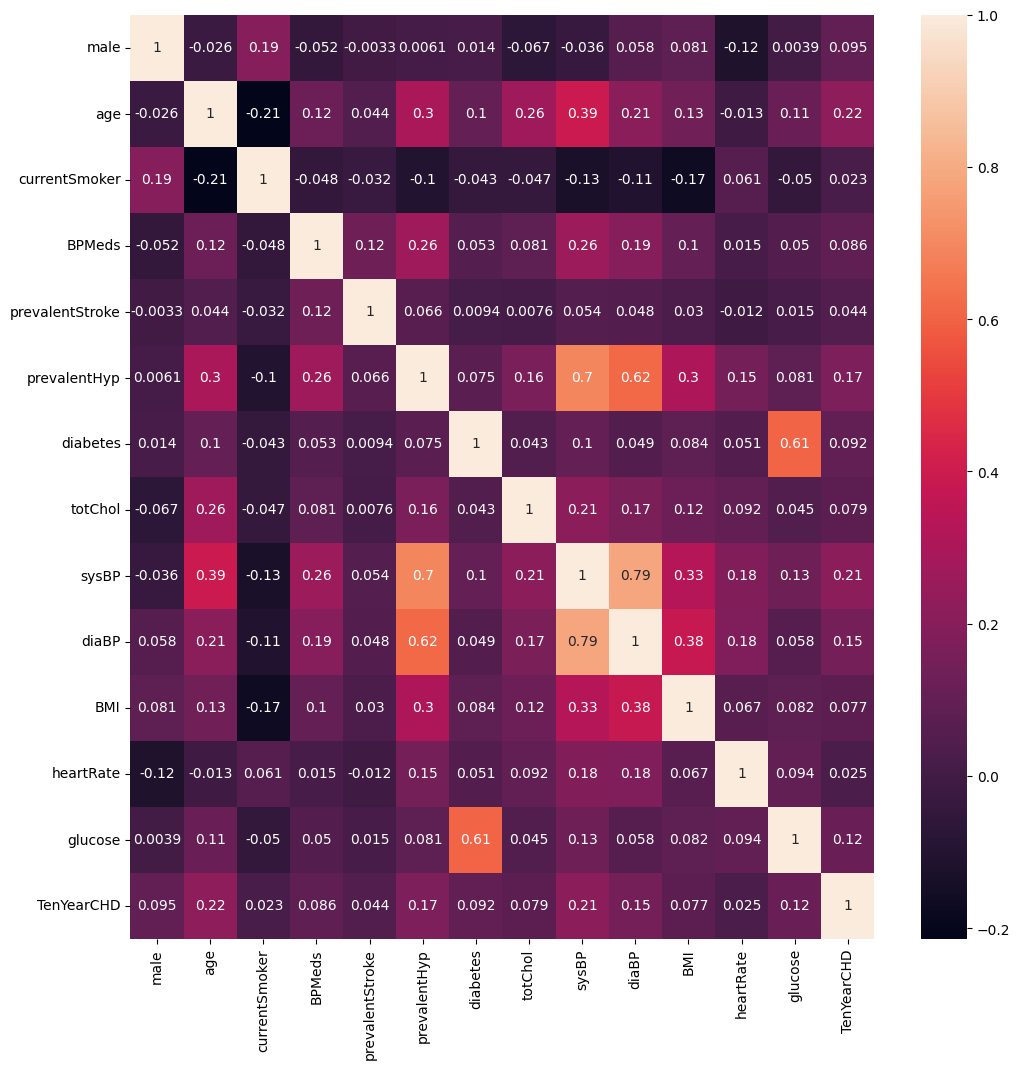

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(hd.corr(),annot=True)

The heatmap provided shows the correlation between different attributes in the  heart disease dataset.
The values in the heatmap represent the correlation coefficient, which ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no correlation.
The meaningful that has been gather from this are .,


1. Gender (Male) and TenYearCHD: The positive correlation between being male and TenYearCHD implies that males may have a slightly increase the risk of developing coronary heart disease in the next ten years compared to females. However, this correlation is not very strong.

2. Age and TenYearCHD: The positive correlation between age and TenYearCHD underscores the importance of age as a risk factor. As individuals get older, their risk of developing coronary heart disease in the next ten years increases. This is a well-known risk factor for heart disease.

3. Current Smoking Status and TenYearCHD: The correlation between current smoking status and TenYearCHD is relatively weak and positive. This suggests that current smokers may have a slightly higher risk of developing coronary heart disease in the next ten years compared to non-smokers.

4. glucose and diabetes: There is a positive correlation between glucose levels and diabetes. Elevated glucose levels are associated with a higher likelihood of diabetes.

5. Glucose and TenYearCHD: The correlation between glucose levels and TenYearCHD is positive but not very strong. Elevated glucose levels may be associated with a slightly higher risk of coronary heart disease in the next ten years.

6. Diabetes and TenYearCHD: The positive correlation between diabetes and TenYearCHD indicates that individuals with diabetes have a higher risk of developing coronary heart disease in the next ten years. Individuals with diabetes are more likely to develop coronary heart disease.

7. Total Cholesterol (totChol) and TenYearCHD: The heatmap shows a relatively weak positive correlation between total cholesterol levels and TenYearCHD. While the correlation is not strong, it indicates that elevated cholesterol levels may be associated with a higher risk of developing coronary heart disease in the next ten years.

8. sysBP and diaBP: Both systolic and diastolic blood pressures (sysBP(lowest point of blood pressure) and diaBP(higest point of the blood pressure)) are strongly positively correlated. This is expected, as they are both components of blood pressure.

9. Blood Pressure (sysBP and diaBP) and TenYearCHD: While both systolic and diastolic blood pressures (sysBP and diaBP) are positively correlated with TenYearCHD, the correlations are not exceptionally strong. However, it still indicates that individuals with higher blood pressure values may be at a slightly increased risk of developing coronary heart disease.

10. BMI and TenYearCHD: Although the correlation between BMI and TenYearCHD is not very strong, it suggests that there may be a connection between body mass index and the risk of coronary heart disease. Individuals with higher BMI values might be at a slightly increased risk.


11. Age and systolic blood pressure (sysBP): Age is positively correlated with sysBP, indicating that blood pressure tends to increase with age.

12. Age and prevalentHyp: Age is also positively correlated with prevalentHyp (prevalent hypertension). This suggests that the prevalence of hypertension increases with age.

13. Age and heartRate: There is a weak negative correlation between age and heart rate. As people age, their heart rates tend to decrease slightly.BMI and prevalentHyp: BMI (Body Mass Index) is positively correlated with prevalentHyp, indicating that individuals with higher BMI are more likely to have hypertension.

14. sysBP and prevalentHyp: sysBP is  is highly positively correlated with prevalentHYP, indicating that higher systolic blood pressure is strongly associated with hypertension.


These information provide a better understanding of the relationships between the various aspect in the dataset, which can be valuable for identifying risk factors and making predictions related to heart disease.

In [ ]:
#sns.pairplot(hd , hue = 'TenYearCHD',
#             vars = ['age'  , 'totChol', 'sysBP' ,'diaBP' , 'BMI' ,  'heartRate', 'glucose'])
#plt.show

# ***Outlier detetion and removel (Z- score)***

In [ ]:
#detecting outliers using z score
# z = (x-mean)/standard_deviation
#if z is not belong to (-3 to +3) then the point is outlier point

for numeric variable

In [ ]:
from scipy import stats

In [ ]:
hd_numeric = hd[['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',	'glucose']]
hd_numeric.head()

,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,195.0,106.0,70.0,26.97,80.0,77.0
1,250.0,121.0,81.0,28.73,95.0,76.0
2,245.0,127.5,80.0,25.34,75.0,70.0
3,225.0,150.0,95.0,28.58,65.0,103.0
4,285.0,130.0,84.0,23.10,85.0,85.0


In [ ]:
z = np.abs(stats.zscore(hd_numeric))
print(z)

       totChol     sysBP     diaBP       BMI  heartRate   glucose
0     0.943556  1.198609  1.086543  0.286071   0.342012  0.217119
1     0.299953  0.513992  0.159982  0.717829   1.585883  0.261156
2     0.186907  0.217324  0.244215  0.113796   0.072611  0.525374
3     0.265278  0.809602  1.019278  0.681032   0.901858  0.927827
4     1.091278  0.103221  0.092717  0.663307   0.756636  0.135172
...        ...       ...       ...       ...        ...       ...
4232  1.373133  1.631142  1.187744  0.653494   1.316482  0.129047
4233  1.724337  2.133195  0.766580  0.040754   0.818934  0.179208
4234  0.672245  0.262965  0.244215  1.494932   0.901858  0.613447
4236  0.604417  0.262965  0.345415  1.629856   0.839560  0.001599
4237  0.729530  0.056523  0.008484  1.063174   0.342012  1.103972

[4165 rows x 6 columns]


In [ ]:
threshold = -3
print(np.where(z < -3 ))

(array([], dtype=int64), array([], dtype=int64))


In [ ]:
threshold = 3
print(np.where(z >3 ))

(array([  28,   35,   37,   37,   44,   44,   65,   76,   85,   85,  105,
        111,  140,  150,  155,  162,  190,  244,  244,  244,  259,  326,
        332,  351,  362,  399,  401,  401,  414,  424,  434,  437,  437,
        472,  472,  472,  522,  524,  534,  581,  608,  655,  666,  739,
        752,  815,  819,  819,  819,  850,  850,  880,  889,  910,  918,
        934,  938,  951,  955,  987, 1006, 1051, 1062, 1093, 1131, 1161,
       1167, 1167, 1215, 1245, 1262, 1338, 1422, 1431, 1460, 1495, 1495,
       1500, 1519, 1541, 1561, 1579, 1585, 1618, 1643, 1660, 1684, 1718,
       1718, 1727, 1775, 1820, 1843, 1843, 1895, 1901, 1949, 1949, 1957,
       1978, 1983, 2044, 2048, 2086, 2116, 2116, 2121, 2124, 2131, 2131,
       2132, 2157, 2185, 2188, 2196, 2213, 2255, 2258, 2258, 2300, 2318,
       2323, 2328, 2338, 2356, 2366, 2366, 2409, 2432, 2438, 2442, 2442,
       2448, 2453, 2556, 2596, 2604, 2604, 2610, 2615, 2630, 2630, 2644,
       2679, 2746, 2780, 2799, 2816, 2827, 2835, 2

In [ ]:
hd = hd[(z < 3).all(axis = 1)]

In [ ]:
hd.shape

(3964, 14)

# **Segregating data variables**

In [ ]:
#x = hd.drop(['TenYearCHD'],axis = 1)
#y = hd['TenYearCHD']
##y = hd.TenYearCHD
#print( x.shape, y.shape)

In [ ]:
x = hd.drop('TenYearCHD', axis = 1)
y = hd['TenYearCHD']

In [ ]:
x.head()

,male,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [ ]:
x.shape

(3964, 13)

In [ ]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [ ]:
y.shape

(3964,)

# **Dimension Reduction for balancing data (k-means clustering)**



In [ ]:
#!pip install imbalanced-learn

In [ ]:
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import KMeans

In [ ]:
count_0 = ( y == 0).sum()
count_1 = ( y == 1).sum()

print("Number of 0s:", count_0)
print("Number of 1s:", count_1)

Number of 0s: 3419
Number of 1s: 545


In [ ]:
# Specify the class you want to undersample (e.g., class 0)
class_to_undersample = 0  # Replace with the actual class label

# Create a K-Means clustering model
kmeans = KMeans(n_clusters=550, random_state=42)

# Fit the K-Means model on the majority class data
majority_class_samples = x[y == class_to_undersample]
kmeans.fit(majority_class_samples)

# Use the K-Means clusters to perform cluster-based undersampling
cc = ClusterCentroids(sampling_strategy={class_to_undersample: 550}, estimator=kmeans)
x, y = cc.fit_resample(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Assuming y_pred is a DataFrame with a column named 'column_name' that you want to count
count_0 = ( y == 0).sum()
count_1 = ( y == 1).sum()

print("Number of 0s:", count_0)
print("Number of 1s:", count_1)

Number of 0s: 550
Number of 1s: 545


# **Train** **Test** **Split**


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, shuffle = True, random_state = 7)

In [ ]:
print('distribution of target variable in training set')
print(y_train.value_counts())

distribution of target variable in training set
0    412
1    409
Name: TenYearCHD, dtype: int64


In [ ]:
print('distribution of target variable in test set')
print(y_test.value_counts())

distribution of target variable in test set
0    138
1    136
Name: TenYearCHD, dtype: int64


In [ ]:
print('Training set :', x_train.shape, y_train.shape)
print('Testing set :', x_test.shape, y_test.shape)

Training set : (821, 13) (821,)
Testing set : (274, 13) (274,)


# **Feature normilization/ Feature scaling / Min-Max Scaling**

In [ ]:
#Feature normilization with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# X_scaled = (X - X_min) / (X_max - X_min)

In [ ]:
scaler = MinMaxScaler()
x_train[['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',	'glucose']] = scaler.fit_transform(x_train[['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',	'glucose']])
x_train.head()

,male,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
826,0,0.176471,1,0,0,0,0,0.320357,0.324561,0.400000,0.322955,0.416667,0.256966
584,0,0.941176,0,0,0,0,0,0.539335,0.390351,0.285714,0.457714,0.333333,0.414861
835,0,0.088235,1,0,0,0,0,0.782644,0.258772,0.285714,0.250465,0.166667,0.303406
1027,1,0.529412,0,0,0,0,1,0.478508,0.258772,0.285714,0.410781,0.433333,0.609907
150,0,0.705882,0,0,0,0,0,0.620438,0.652778,0.550000,0.430143,0.822222,0.464396


In [ ]:
x_test[['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',	'glucose']] = scaler.fit_transform(x_test[['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',	'glucose']])
x_test.head()

,male,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1049,0,0.823529,0,0,0,0,0,0.791667,0.000000,0.195312,0.298272,0.148936,0.303922
587,0,0.529412,0,0,0,1,0,0.731481,0.342995,0.578125,0.514228,0.114894,0.313725
605,1,0.235294,1,0,0,0,0,0.462963,0.323671,0.539062,0.301321,0.659574,0.362419
282,0,0.411765,0,0,0,0,0,0.150000,0.102415,0.275000,0.250407,0.125106,0.354902
309,0,0.323529,0,0,0,0,0,0.230710,0.288245,0.414062,0.409299,0.009929,0.259804


# **Model**



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

Best_model

In [ ]:
data = {
    'Model': [],
    'Accuracy of train dataset': [],
    'Accuracy of test dataset': [],
    'Area under ROC curve': []
}

print(data)

model = pd.DataFrame(data)

model


{'Model': [], 'Accuracy of train dataset': [], 'Accuracy of test dataset': [], 'Area under ROC curve': []}


,Model,Accuracy of train dataset,Accuracy of test dataset,Area under ROC curve


## **Logistic Regression Model**

In [ ]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_scores = model1.predict_proba(x_test)[:,1]

In [ ]:
#y_scores

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
area1 = roc_auc

In [ ]:
#thresholds

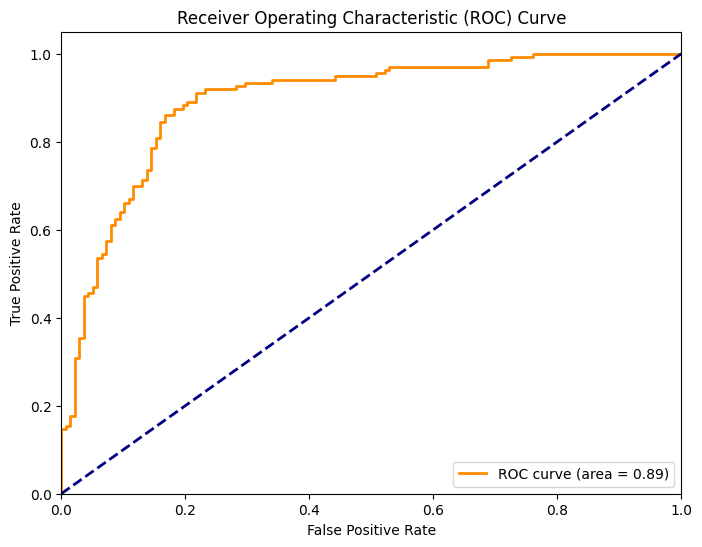

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Assume that fpr, tpr, thresholds have already been calculated
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.372008432058331


In [ ]:
y_predtrain1 = model1.predict(x_train)
print('Accuracy of the logistic Regression on train dataset is ', accuracy_score(y_train, y_predtrain1 ))

y_predtest1 = model1.predict(x_test)
print('Accuracy of the logistic Regression on test dataset is ', accuracy_score(y_test, y_predtest1 ))

Accuracy of the logistic Regression on train dataset is  0.8416565164433617
Accuracy of the logistic Regression on test dataset is  0.8248175182481752


In [ ]:
data ['Model'].append('LogisticRegression')
data ['Accuracy of train dataset'].append("{:.3f}%".format(accuracy_score(y_train, y_predtrain1 ) *100 ))
data ['Accuracy of test dataset'].append("{:.3f}%".format(accuracy_score(y_test, y_predtest1 ) *100 ))
data ['Area under ROC curve'].append("{:.3f}".format(area1))

In [ ]:
data

{'Model': ['LogisticRegression'],
 'Accuracy of train dataset': ['84.166%'],
 'Accuracy of test dataset': ['82.482%'],
 'Area under ROC curve': ['0.894']}

In [ ]:
model = pd.DataFrame(data)
model

,Model,Accuracy of train dataset,Accuracy of test dataset,Area under ROC curve
0,LogisticRegression,84.166%,82.482%,0.894


Confusion matrix 
 [[116  22]
 [ 26 110]]


<Axes: >

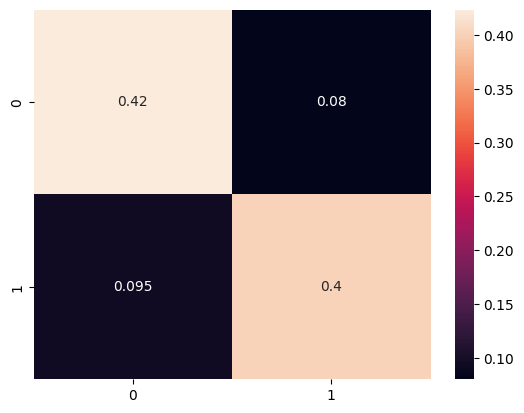

In [ ]:
predtest1 = model1.predict(x_test)
matrix = confusion_matrix(y_test, y_predtest1)
print("Confusion matrix \n", matrix)
sns.heatmap(matrix/np.sum(matrix), annot = True)

## **K-Nearest Neighbors (KNN)**

In [ ]:
model_knn = KNeighborsClassifier()
model_knn .fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_predknntrain = model_knn.predict(x_train)
print('Accuracy of the KNN on train dataset is ', accuracy_score(y_train, y_predknntrain ))

y_predknntest = model_knn.predict(x_test)
print('Accuracy of the KNN on test dataset is ', accuracy_score(y_test, y_predknntest))

Accuracy of the KNN on train dataset is  0.8745432399512789
Accuracy of the KNN on test dataset is  0.8284671532846716


Elbow Method

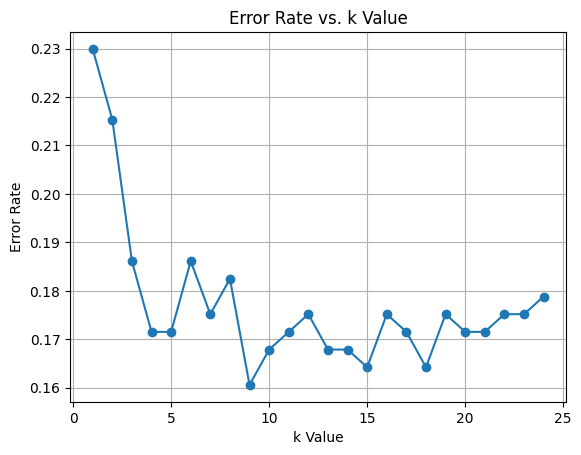

In [ ]:
#elbow method is used to find optimal nearest neighbors(k)
error_rates = []

k_values = range(1, 25)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error_rate = 1 - knn.score(x_test, y_test)
    error_rates.append(error_rate)

#plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='-')
plt.title('Error Rate vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()


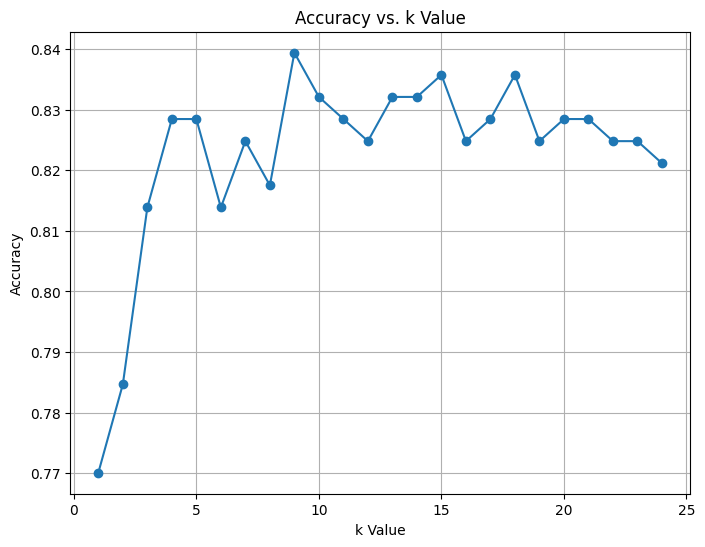

In [ ]:
accuracies = []

k_values = range(1, 25)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Grid Search with Cross-Validation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier()

# Define a range of k values to test
param_grid = {'n_neighbors': range(1, 21)}  # Adjust the range as needed

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')  # Use the appropriate scoring metric

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best k:", grid_search.best_params_['n_neighbors'])
print("Best Accuracy:", grid_search.best_score_)

Best k: 18
Best Accuracy: 0.8367701404286769


In [ ]:
##manual
#from sklearn import model_selection
#score = []
#for k in range (1,25):
#  model_knn = KNeighborsClassifier(n_neighbors = k)
#  model_knn.fit(x_train, y_train)
#  y_pred = model_knn.predict(x_test)
#  score.append(accuracy_score(y_test, y_pred))

#print(max(score))
#print(score.index(max(score)))

In [ ]:
 model2 = KNeighborsClassifier(9)

 model2.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_scores = model2.predict_proba(x_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
area2 = roc_auc

In [ ]:
thresholds

array([2.        , 1.        , 0.88888889, 0.77777778, 0.66666667,
       0.55555556, 0.44444444, 0.33333333, 0.22222222, 0.11111111,
       0.        ])

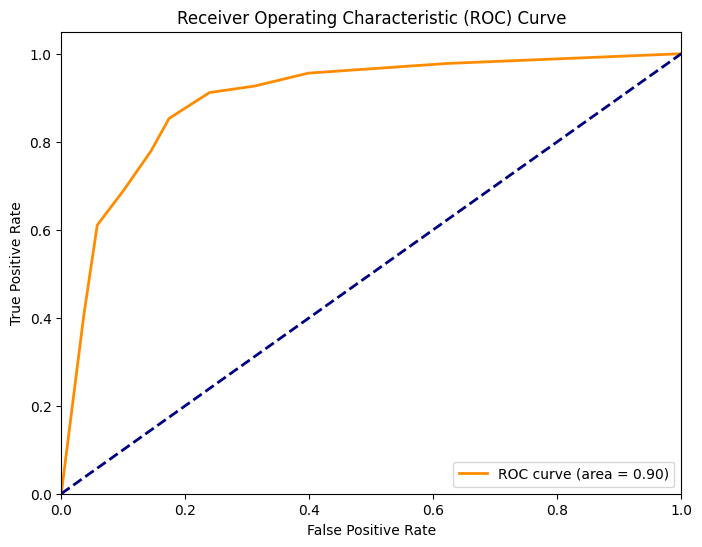

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Assume that fpr, tpr, thresholds have already been calculated
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.5555555555555556


In [ ]:
#y_predtrain2 = model2.predict(x_test)
# accuracy_score(y_test, y_predtrain2)

#y_predtest2 = model2.predict(x_train)
#accuracy_score(y_train, y_predtest2)

In [ ]:
y_predtrain2 = model2.predict(x_train)
print('Accuracy of the KNN on train dataset is ', accuracy_score(y_train, y_predtrain2 ))

y_predtest2 = model2.predict(x_test)
print('Accuracy of the KNN on test dataset is ', accuracy_score(y_test, y_predtest2))

Accuracy of the KNN on train dataset is  0.853836784409257
Accuracy of the KNN on test dataset is  0.8394160583941606


In [ ]:
data ['Model'].append('KNN')
data ['Accuracy of train dataset'].append("{:.3f}%".format(accuracy_score(y_train, y_predtrain2 ) *100 ))
data ['Accuracy of test dataset'].append("{:.3f}%".format(accuracy_score(y_test, y_predtest2 ) *100 ))
data ['Area under ROC curve'].append("{:.3f}".format(area2))

In [ ]:
data

{'Model': ['LogisticRegression', 'KNN'],
 'Accuracy of train dataset': ['84.166%', '85.384%'],
 'Accuracy of test dataset': ['82.482%', '83.942%'],
 'Area under ROC curve': ['0.894', '0.898']}

In [ ]:
model = pd.DataFrame(data)
model

,Model,Accuracy of train dataset,Accuracy of test dataset,Area under ROC curve
0,LogisticRegression,84.166%,82.482%,0.894
1,KNN,85.384%,83.942%,0.898


Confusion matrix 
 [[114  24]
 [ 20 116]]


<Axes: >

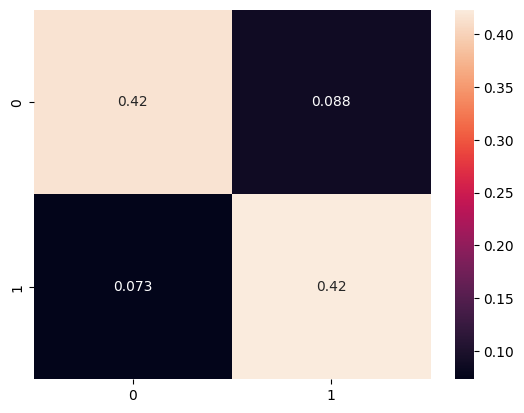

In [ ]:
predtest2 = model2.predict(x_test)
matrix = confusion_matrix(y_test, y_predtest2)
print("Confusion matrix \n", matrix)
sns.heatmap(matrix/np.sum(matrix), annot = True)

# ***Feature Extraction using Principal Component Analysis (PCA)***

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
print(x.shape)
#num_components_to_test = np.arange(1, 13)

(1095, 13)


In [ ]:
explained_variances = []

for num_components in range(1, 14):
    pca = PCA(n_components=num_components)
    X_pca = pca.fit_transform(x)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))


In [ ]:
print(explained_variances)

[0.6696859151017825, 0.8474929055766132, 0.9181118676833164, 0.9640185097314276, 0.985185046332705, 0.9970339561102834, 0.9998156779494086, 0.9999172519788135, 0.9999527996339657, 0.9999860151598865, 0.9999933835872656, 0.9999977243618059, 1.0]


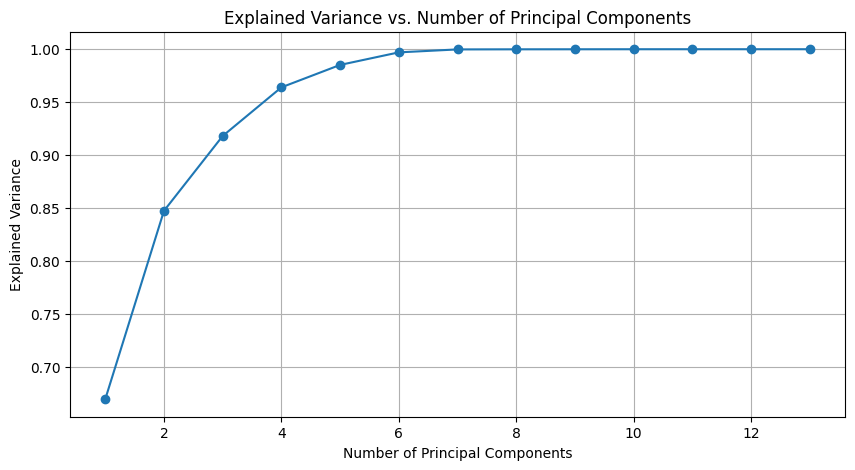

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1,14), explained_variances, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components = 6)
X_pca = pca.fit_transform(x)

explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.66968592, 0.17780699, 0.07061896, 0.04590664, 0.02116654,
       0.01184891])

In [ ]:
eigen_values = pca.explained_variance_
print(eigen_values)

[2105.63839252  559.06390916  222.04139956  144.34048229   66.55220171
   37.25555335]


In [ ]:
eigen_vectors = pca.components_
print(eigen_vectors)

[[ 6.11768351e-04 -3.71291427e-02 -2.52909554e-04 -2.47333078e-04
  -5.06157943e-05 -1.45778740e-03  2.23026401e-05 -9.90342120e-01
  -1.17645861e-01 -5.19270800e-02 -1.26195422e-02 -2.53860515e-02
  -2.23743211e-02]
 [ 1.42131153e-03  1.18764087e-01 -1.06567221e-04  1.17157889e-03
   2.49923307e-04  1.30020936e-02  2.96625733e-04 -1.36306533e-01
   8.82896335e-01  3.99754883e-01  3.87368691e-02  1.07027535e-01
   1.21974050e-01]
 [ 1.24763453e-04  2.77515095e-02 -1.39659399e-04 -1.69088362e-04
  -3.44404763e-05 -1.70171169e-03  2.39902011e-03 -7.90356406e-03
  -1.12032400e-01 -9.27252328e-02  5.63412472e-03  1.07459254e-01
   9.83071823e-01]
 [-3.26823286e-03 -1.62436323e-01  4.26997349e-03  9.46672407e-06
  -1.23919518e-04 -4.30672004e-04 -4.37632958e-04 -6.56481052e-03
  -1.00308608e-01  4.06060887e-02 -5.28768321e-03  9.74575993e-01
  -1.09567515e-01]
 [ 1.20854667e-03  8.01616743e-01  7.30388967e-04  8.20489434e-04
   2.58845056e-04  3.77224826e-03  4.38983360e-04 -1.86793010e-02


In [ ]:
print('Shape of original data is ', x.shape)
print('Shape of data after pca is ', X_pca.shape)

Shape of original data is  (1095, 13)
Shape of data after pca is  (1095, 6)


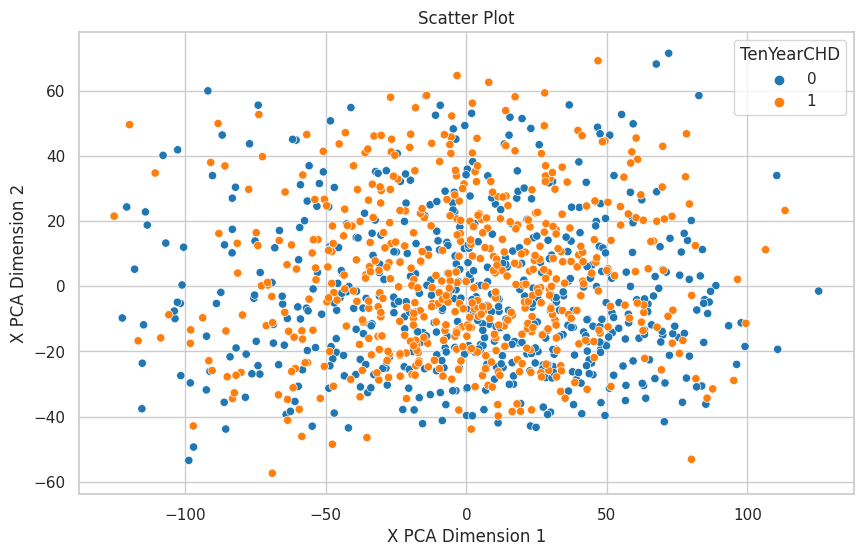

In [ ]:

sns.set(style="whitegrid")  # Set the style

plt.figure(figsize=(10, 6))  # Set the figure size
scatter = sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="tab10")  # Create the scatter plot

scatter.set(xlabel='X PCA Dimension 1', ylabel='X PCA Dimension 2')
scatter.set_title("Scatter Plot")

plt.show()


In [ ]:
#import plotly.express as px

In [ ]:
#plt.figure(figsize=(10, 6))
#fig = px.scatter(x=X_pca[:,0],
#                y=X_pca[:,1],
#                color=y,
#                color_discrete_sequence=px.colors.qualitative.G10
#                )
#
#fig.show()

In [ ]:
#fig = px.scatter_3d(x=X_pca[:,0],  # Assuming X_pca is your PCA-transformed data
#                 y=X_pca[:,1],
#                 z=X_pca[:,2],
#                 color=y,  # This will color the points based on the target labels
#                 color_discrete_sequence=px.colors.qualitative.G10
#                 )
#
#fig.show()

# **Model after Feature Extraction**

In [ ]:
X_pca

array([[ 16.79592388, -30.00904717,  -6.73912448,   9.67348801,
         -5.86880747,   5.45471051],
       [-59.04944844, -10.01323362,  -3.97416244,   5.44736722,
          1.5432432 ,  -5.41525317],
       [ 10.32124374,  25.29205687,  -1.61001007,  -3.8737682 ,
          5.69604257,  -2.98916224],
       ...,
       [  8.35497649,  -9.89216102,  -5.19437594,  -8.51356874,
          2.73594064,  -7.83413625],
       [ 58.90402922,  41.30186714,  -8.25425907, -20.63475248,
          9.01974836,  -5.55946502],
       [-77.48388846,  29.80870618,  -3.06324155, -14.84691366,
         -3.43140198,  13.72413866]])

In [ ]:
#train and test split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y, test_size = 0.25, stratify = y, random_state = 7 )

In [ ]:
#Feature normilization with MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[0.68609752, 0.31270053, 0.28437532, 0.49376792, 0.32258203,
        0.40428801],
       [0.46341193, 0.3191131 , 0.43571853, 0.30235873, 0.77398444,
        0.30753985],
       [0.23749832, 0.09861036, 0.32032288, 0.26253954, 0.24714684,
        0.51503465],
       ...,
       [0.62366467, 0.20504631, 0.36218837, 0.56214918, 0.43479597,
        0.4979651 ],
       [0.53882192, 0.39866273, 0.11819515, 0.48546702, 0.21526742,
        0.32891301],
       [0.40837343, 0.37619496, 0.46227331, 0.43985353, 0.28787511,
        0.38096925]])

In [ ]:
X_test = scaler.fit_transform(X_test)
X_test

array([[0.25228946, 0.        , 0.39575438, 0.19674118, 0.62331127,
        0.12624451],
       [0.2871024 , 0.34815809, 0.33655062, 0.14915139, 0.23568846,
        0.1679947 ],
       [0.54385106, 0.4131954 , 0.43046693, 0.67995718, 0.21603449,
        0.28442031],
       ...,
       [0.25403656, 0.33284291, 0.4231929 , 0.83216267, 0.655629  ,
        0.36949219],
       [0.20936109, 0.19429817, 0.57330499, 0.24245435, 0.51320411,
        0.31401818],
       [0.59918865, 0.3955852 , 0.35110445, 0.25523982, 0.463756  ,
        0.17449944]])

## **Logistic Regression Model**



In [ ]:
model3 = LogisticRegression()
model3.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
Y_scores = model3.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_scores)
roc_auc = auc(fpr, tpr)
area3 = roc_auc

In [ ]:
#thresholds

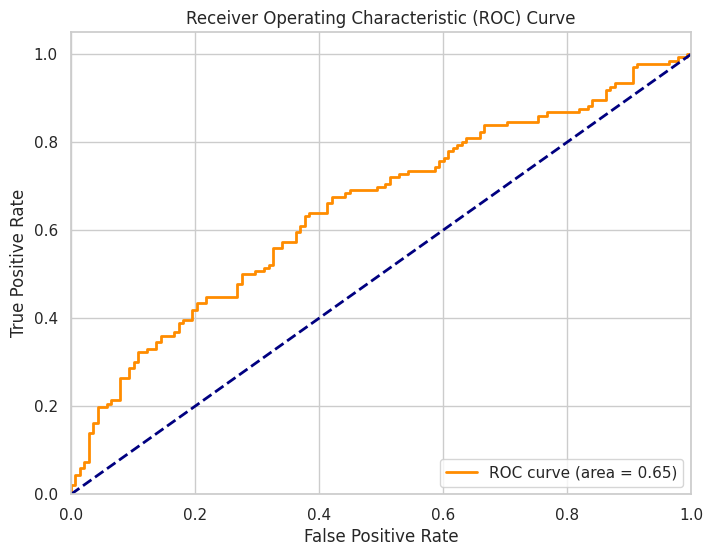

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
Y_predtrain3 = model3.predict(X_train)
print('Accuracy of the logistic Regression after PCA on train dataset is ', accuracy_score(Y_train, Y_predtrain3 ))

Y_predtest3 = model3.predict(X_test)
print('Accuracy of the logistic Regression after PCA on test dataset is ', accuracy_score(Y_test, Y_predtest3 ))

Accuracy of the logistic Regression after PCA on train dataset is  0.610231425091352
Accuracy of the logistic Regression after PCA on test dataset is  0.6204379562043796


In [ ]:
data ['Model'].append('LogisticRegression after feature extration')
data ['Accuracy of train dataset'].append("{:.3f}%".format(accuracy_score(Y_train, Y_predtrain3 ) *100 ))
data ['Accuracy of test dataset'].append("{:.3f}%".format(accuracy_score(Y_test, Y_predtest3 ) *100 ))
data ['Area under ROC curve'].append("{:.3f}".format(area3))

In [ ]:
data

{'Model': ['LogisticRegression',
  'KNN',
  'LogisticRegression after feature extration'],
 'Accuracy of train dataset': ['84.166%', '85.384%', '61.023%'],
 'Accuracy of test dataset': ['82.482%', '83.942%', '62.044%'],
 'Area under ROC curve': ['0.894', '0.898', '0.651']}

In [ ]:
model = pd.DataFrame(data)
model

,Model,Accuracy of train dataset,Accuracy of test dataset,Area under ROC curve
0,LogisticRegression,84.166%,82.482%,0.894
1,KNN,85.384%,83.942%,0.898
2,LogisticRegression after feature extration,61.023%,62.044%,0.651


Confusion matrix 
 [[81 57]
 [47 89]]


<Axes: >

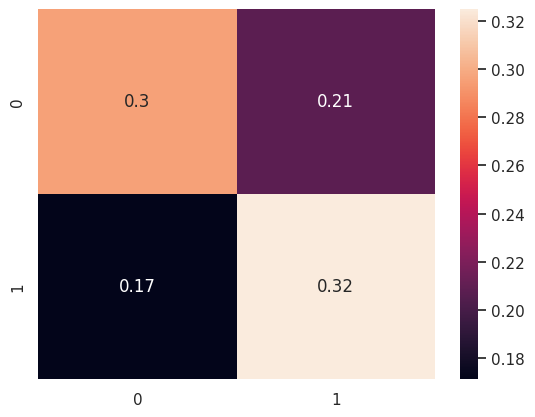

In [ ]:
predtest3 = model3.predict(X_test)
matrix = confusion_matrix(Y_test, Y_predtest3)
print("Confusion matrix \n", matrix)
sns.heatmap(matrix/np.sum(matrix), annot = True)

## **K-Nearest Neighbors (KNN)**

In [ ]:
model_knnpca = KNeighborsClassifier()
model_knnpca .fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
Y_predknnpcatrain = model_knnpca.predict(X_train)
print('Accuracy of the KNN after PCA on train dataset is ', accuracy_score(Y_train, Y_predknnpcatrain ))

Y_predknnpcatest = model_knnpca.predict(X_test)
print('Accuracy of the KNN on test dataset is ', accuracy_score(Y_test, Y_predknnpcatest))

Accuracy of the KNN after PCA on train dataset is  0.6723507917174177
Accuracy of the KNN on test dataset is  0.5364963503649635


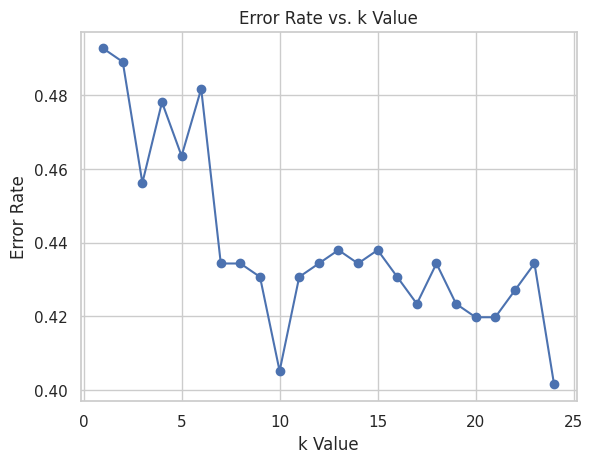

In [ ]:
#elbow method is used to find optimal nearest neighbors(k)
error_rates = []

k_values = range(1, 25)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    error_rate = 1 - knn.score(X_test, Y_test)
    error_rates.append(error_rate)

#plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='-')
plt.title('Error Rate vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()


In [ ]:
 model4 = KNeighborsClassifier(10)

 model4.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
Y_scores = model4.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_scores)
roc_auc = auc(fpr, tpr)
area4 = roc_auc

In [ ]:
thresholds

array([2. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

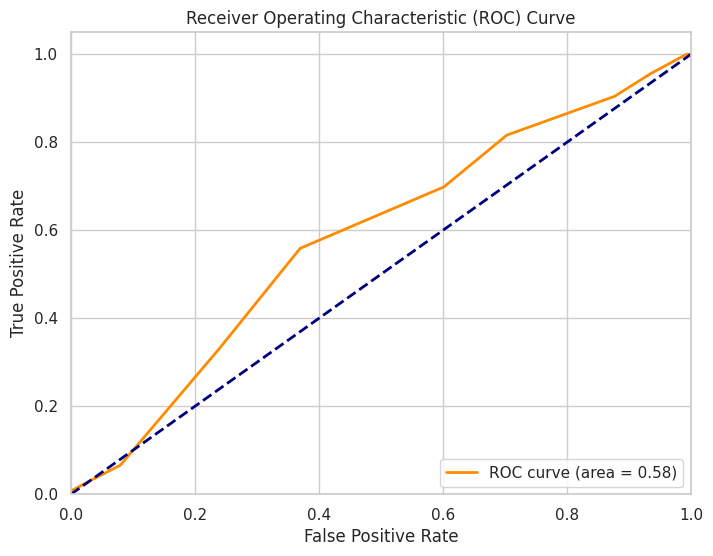

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Assume that fpr, tpr, thresholds have already been calculated
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.6


In [ ]:
Y_predtrain4 = model4.predict(X_train)
print('Accuracy of the KNN after PCA on train dataset is ', accuracy_score(Y_train, Y_predtrain4 ))

Y_predtest4 = model4.predict(X_test)
print('Accuracy of the KNN after PCA on test dataset is ', accuracy_score(Y_test, Y_predtest4))

Accuracy of the KNN after PCA on train dataset is  0.6370280146163215
Accuracy of the KNN after PCA on test dataset is  0.5948905109489051


In [ ]:
data ['Model'].append('KNN after Feature extration')
data ['Accuracy of train dataset'].append("{:.3f}%".format(accuracy_score(Y_train, Y_predtrain4 ) *100 ))
data ['Accuracy of test dataset'].append("{:.3f}%".format(accuracy_score(Y_test, Y_predtest4 ) *100 ))
data ['Area under ROC curve'].append("{:.3f}".format(area4))

In [ ]:
data

{'Model': ['LogisticRegression',
  'KNN',
  'LogisticRegression after feature extration',
  'KNN after Feature extration'],
 'Accuracy of train dataset': ['84.166%', '85.384%', '61.023%', '63.703%'],
 'Accuracy of test dataset': ['82.482%', '83.942%', '62.044%', '59.489%'],
 'Area under ROC curve': ['0.894', '0.898', '0.651', '0.583']}

In [ ]:
model = pd.DataFrame(data)
model

,Model,Accuracy of train dataset,Accuracy of test dataset,Area under ROC curve
0,LogisticRegression,84.166%,82.482%,0.894
1,KNN,85.384%,83.942%,0.898
2,LogisticRegression after feature extration,61.023%,62.044%,0.651
3,KNN after Feature extration,63.703%,59.489%,0.583


Confusion matrix 
 [[87 51]
 [60 76]]


<Axes: >

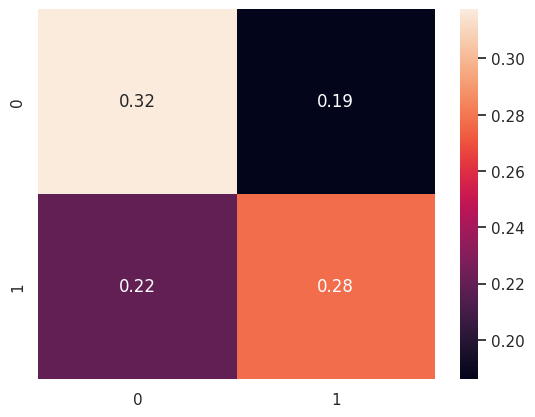

In [ ]:
predtest4 = model4.predict(X_test)
matrix = confusion_matrix(Y_test, Y_predtest4)
print("Confusion matrix \n", matrix)
sns.heatmap(matrix/np.sum(matrix), annot = True)

# **Heart Disease Predication**

In [ ]:
1
# Get user input for the attributes
male = int(input("Enter Gender (0: Female, 1: Male) ::"))
age = int(input("Enter Age :: "))
currentSmoker = int(input("Enter Current Smmoking (0:no or 1:yes) :: "))
BPMeds = int(input("Enter BPMeds (0:no or 1:yes) :: "))
prevalentStroke = int(input("EnterPrevalent Stroke (0:no or 1:yes) :: "))
prevalentHyp = int(input("Enter Prevalent Hypertension (0:no or 1:yes) :: "))
diabetes = int(input("Enter Diabetes (0:no or 1:yes) :: "))
totChol = float(input("Enter Total Cholesterol :: "))
sysBP = float(input("Enter Systolic Blood Pressure :: "))
diaBP = float(input("Enter Diastolic Blood Pressure :: "))
BMI = float(input("Enter BMI :: "))
heartRate = float(input("Enter Heart Rate :: "))
glucose = float(input("Enter Glucose :: "))

Enter Gender (0: Female, 1: Male) ::0
Enter Age :: 61
Enter Current Smmoking (0:no or 1:yes) :: 1
Enter BPMeds (0:no or 1:yes) :: 0
EnterPrevalent Stroke (0:no or 1:yes) :: 0
Enter Prevalent Hypertension (0:no or 1:yes) :: 1
Enter Diabetes (0:no or 1:yes) :: 0
Enter Total Cholesterol :: 225
Enter Systolic Blood Pressure :: 150
Enter Diastolic Blood Pressure :: 95
Enter BMI :: 28.5
Enter Heart Rate :: 65
Enter Glucose :: 103


In [ ]:
new_data = pd.DataFrame({
    'male' : male,
    'age' : age,
    'currentSmoker'	: currentSmoker,
    'BPMeds' : BPMeds,
    'prevalentStroke'	: prevalentStroke,
    'prevalentHyp' : prevalentHyp,
    'diabetes' : diabetes,
    'totChol'	: totChol,
    'sysBP' : sysBP,
    'diaBP' :	diaBP,
    'BMI' : BMI,
    'heartRate' :	heartRate,
    'glucose' : glucose,
},index = [0])

In [ ]:
new_data

,male,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0,61,1,0,0,1,0,225.0,150.0,95.0,28.5,65.0,103.0


In [ ]:
prediction = model2.predict(new_data)

print("Predicted class:", prediction)
if prediction[0] == 0:
   print("You do not have heart disease.")
else:
   print("You have heart disease.")

Predicted class: [0]
You do not have heart disease.


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX